In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

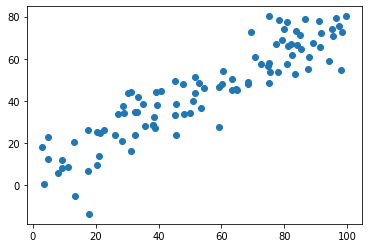

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## demean

In [6]:
def demean(X):
    return X - np.mean(X, axis=0)

In [11]:
X_demean = demean(X)

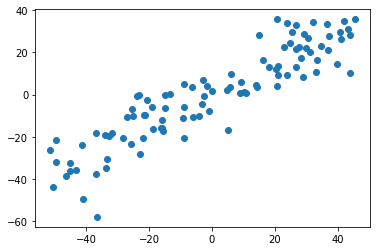

In [12]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [13]:
np.mean(X_demean[:,0])

2.4371615836571438e-14

In [14]:
np.mean(X_demean[:,1])

-4.7606363295926715e-15

## Gradient Ascent

In [15]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # Attention 1：Find one unit direction at a time
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [16]:
initial_w = np.random.random(X.shape[1]) # Attention 2：Cannot start with vector 0
initial_w

array([0.29780232, 0.74562044])

In [17]:
eta = 0.001
# Attention 3： Cannot use StandardScaler to normalize data

In [18]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.79632173, 0.60487329])

In [19]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.79632173, 0.60487329])

In [20]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

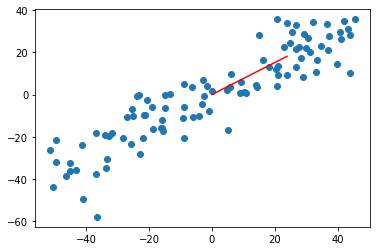

In [29]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()